In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

In [3]:
# 2016年1年分のDataFrameを用意
start_date = "2016-01-01"
end_date = "2016-12-31"
df = pd.DataFrame(index=pd.date_range(start_date, end_date))

# 日経平均のデータを読み込んでjoinする
df = df.join(pd.read_csv("n225.csv", index_col="Date", parse_dates=True, usecols=["Date", "Adj Close"]))

# 終値がない日（市場が休みの日）を取り除く
df = df.dropna()
print(df.head())

               Adj Close
2016-01-04  18450.980469
2016-01-05  18374.000000
2016-01-06  18191.320312
2016-01-07  17767.339844
2016-01-08  17697.960938


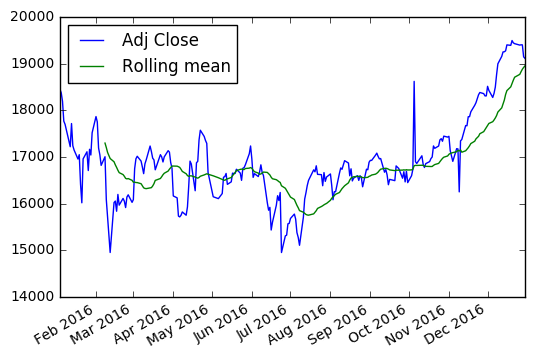

In [4]:
# 25日移動平均の計算
rm = df.rolling(window=25).mean()

# プロット
ax = df.plot()
rm.columns = ["Rolling mean"]
rm.plot(ax=ax)

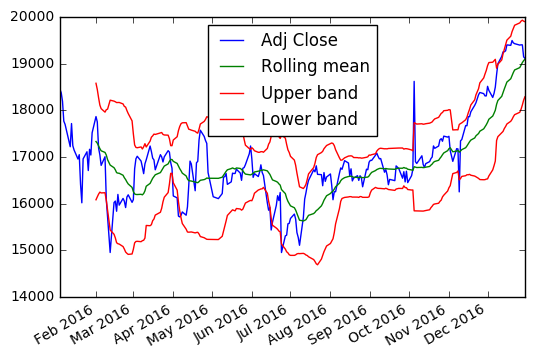

In [5]:
# ボリンジャーバンドの計算
rm = df.rolling(window=20).mean()
rstd = df.rolling(window=20).std()
upper_band = rm + rstd * 2
lower_band = rm - rstd * 2

# プロット
ax = df.plot(color="blue")
rm.columns = ["Rolling mean"]
rm.plot(ax=ax, color="green")
upper_band.columns = ["Upper band"]
upper_band.plot(ax=ax, color="red")
lower_band.columns = ["Lower band"]
lower_band.plot(ax=ax, color="red")

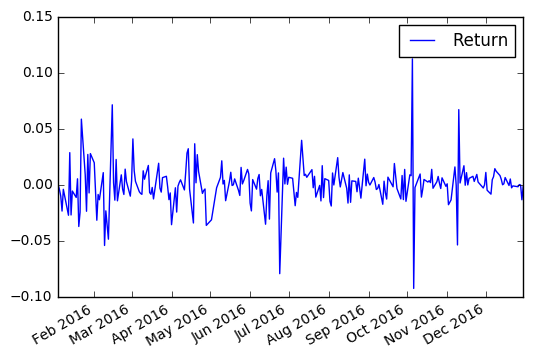

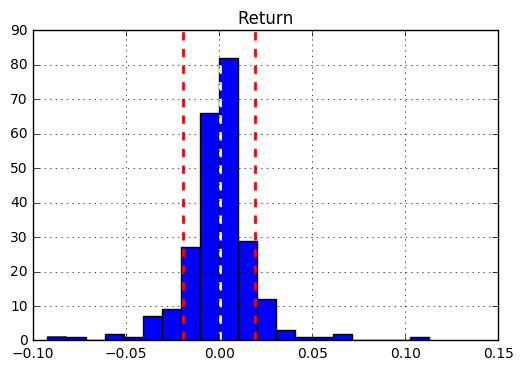

In [6]:
# 日次リターンの計算
daily_return = df / df.shift() - 1
daily_return.ix[0,0] = 0
daily_return.columns=["Return"]
daily_return.plot() # そのままプロット
daily_return.hist(bins=20) # ヒストグラム
plt.axvline(daily_return["Return"].mean(), color="w", linestyle="dashed", linewidth=2)
std = daily_return["Return"].std()
plt.axvline(std, color="r", linestyle="dashed", linewidth=2)
plt.axvline(-std, color="r", linestyle="dashed", linewidth=2)

          n225       spy
n225  1.000000  0.185885
spy   0.185885  1.000000


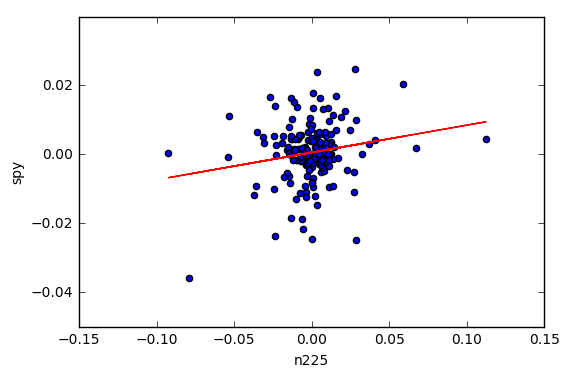

In [7]:
# 日経平均とS&P500の日次リターンの散布図を描画し直線をフィットさせる

# まずは日次リターンの計算
start_date = "2016-01-01"
end_date = "2016-12-31"
df = pd.DataFrame(index=pd.date_range(start_date, end_date))
symbols = ["n225", "spy"]
for symbol in symbols:
    df = df.join(pd.read_csv("%s.csv" % symbol, index_col="Date", parse_dates=True, usecols=["Date", "Adj Close"]))
    df = df.rename(columns={"Adj Close": symbol})
df = df / df.shift() - 1
df = df.dropna()

# そして散布図と直線をプロット
# この例の場合はあまり相関がなさそうなので直線を引くのは不適切かもしれませんが、
# 手法を紹介することが目的なので直線も引いてしまいます。
df.plot(kind="scatter", x="n225", y="spy")
beta, alpha = np.polyfit(df["n225"], df["spy"], 1)
plt.plot(df["n225"], beta * df["n225"] + alpha, '-', color='r')

# 相関係数も求めておく
print(df.corr())